# Big Data Mart Sales Problem:

Submitted by **POOJA C** Batch No:1831.

**STATEMENT: The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.**

**Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.**

**The dataset includes two files:**

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

# Importing dataset:

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Train data:

In [2]:
df=pd.read_csv("Bigdata_train.csv") #reading csv file
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Above is my train dataset.And i can notice that i have to predict outlet sales so Item_Outlet_Sales is my target column and the data in this column are continous so it's a **Regression problem**.

# EDA:

In [3]:
#Checking shape of my dataset
df.shape

(8523, 12)

In my data set i have 8523 rows and 12 columns.

In [4]:
#Checking all column names in my data set
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

Above are the column names of my data set.

In [5]:
#Checking the data types of each column
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

I have Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type and Outlet_Type as object type data.Item_Weight, Item_Visibility, Item_MRP and Item_Outlet_Sales are float type data.And only Outlet_Establishment_Year is integer type data.

In [6]:
#Checking info of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


I can observe from non-null count that in some columns of my data set there are null values and i have to remove them.And also i see the data types of all columns.

In [7]:
#Checking unique values in each column
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Above are the unique value counts of each of the columns of my dataset.

In [8]:
#Checking the null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are null values in Item_weight and Outlet_Size.I have to remove them.

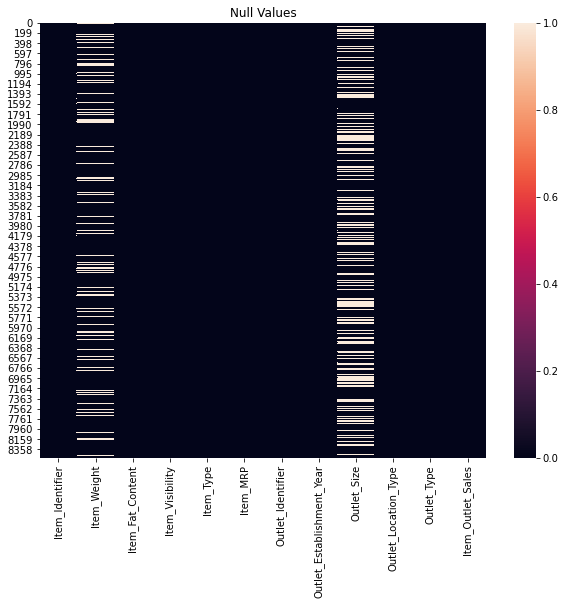

In [9]:
plt.figure(figsize=[10,8])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

By visualization it looks easy to notice null values, there are null values in two columns.

In [10]:
#Checking unique values in target column
df['Item_Outlet_Sales'].unique()

array([3735.138 ,  443.4228, 2097.27  , ..., 7182.6504, 3608.636 ,
       2778.3834])

Above are the unique values of target column.

In [11]:
#Checking for any empty observation in target column
df.loc[df['Item_Outlet_Sales'] == " "]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


There is no empty observations in my target column.

In [12]:
#describing the data set
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Above are the informations about the data set.I can observe from above output that
- Mean of Item_MRP is more than any other column which means sales is very much correlated with item mrp.
- By observing count we can notice whather there are null values or not.
- The Item_MRP starts from 31.29 and it goes uptp 266.88.

# Univariate Analysis:

# Item_Outlet_Sales(Target Column):

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

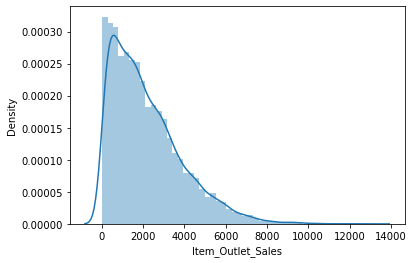

In [13]:
#Checking distribution of target variable
sns.distplot(df['Item_Outlet_Sales'])

My target variable is not normally distributed, which mean the distribution of  sales in all the oultets is not normal.I have to check further to get more insight about the data.

# Item_Weight:

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

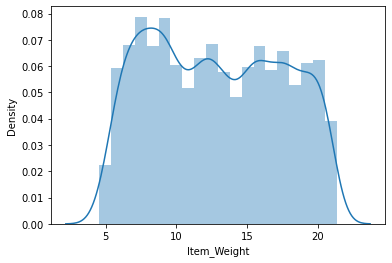

In [14]:
sns.distplot(df['Item_Weight'])

Item_Weight looks almost normally distributed.But i already know there is null values in Item_weight column.So i have to remove them.

# Item_Fat_Content:

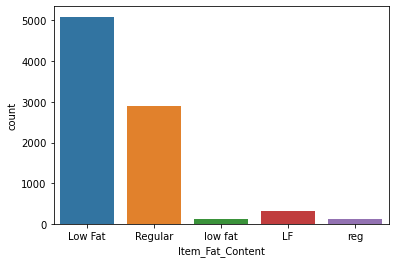

In [15]:
sns.countplot(df['Item_Fat_Content']);

- I can observe that Low Fat has multiple countings like LF and low fat and also Regular has multiple countings. 
- I have to merge all LF, low fat with Low Fat.And reg with Regular.

In [16]:
df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

LF, low fat belong to same category that is Low Fat and reg belong to Regular category so replacing LF, low fat and reg to thier category.

In [17]:
df.Item_Fat_Content=df.Item_Fat_Content.replace('LF','Low Fat')
df.Item_Fat_Content=df.Item_Fat_Content.replace('low fat','Low Fat')
df.Item_Fat_Content=df.Item_Fat_Content.replace('reg','Regular')

I have replace LF and low fat by Low Fat, and reg by Regular.Now lets check the value count of Item_Fat_Content.

In [18]:
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Now in Item_Fat_Content i have only two categories.

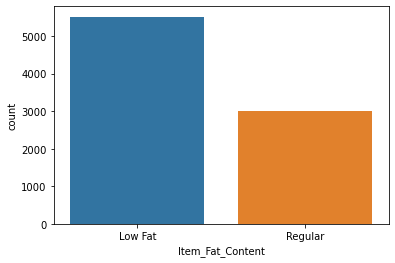

In [19]:
sns.countplot(df['Item_Fat_Content']);

Maximum items sold are of Low Fat almost 6000 products are Low Fat.
- It means that producing low fat items will increase the sales rate.

# Item_Visibility:

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

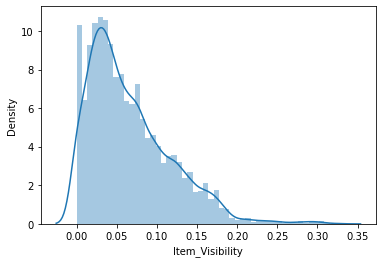

In [20]:
sns.distplot(df['Item_Visibility'])

The distribution of Item Visibility is skewed which means if the visibility is more then density is going less.

# Item_Type:

In [21]:
df.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Above are the value counts of item type.

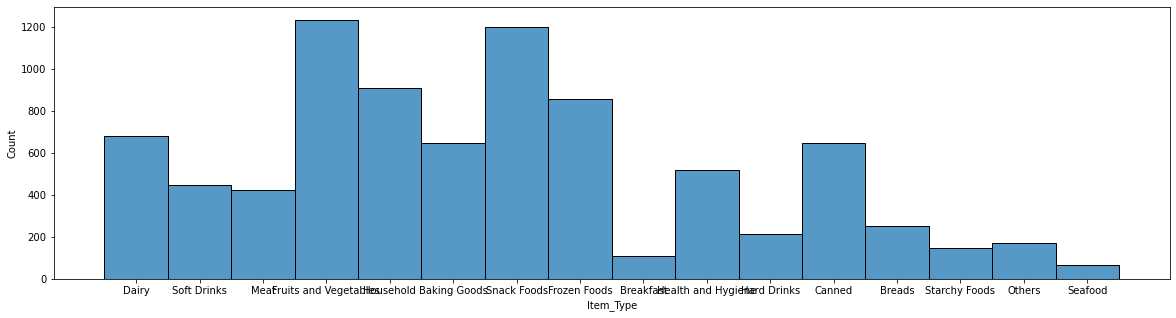

In [22]:
plt.figure(figsize=(20,5))
sns.histplot(df['Item_Type'])
plt.show()

I can observe that Fruits and vegetables,snack food is having maximum count which mean producing these two types of products will increase the sales.

# Item_MRP:

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

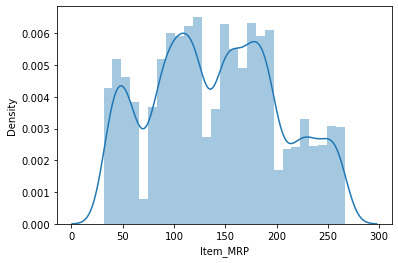

In [23]:
sns.distplot(df['Item_MRP'])

It looks not normal and the distribution is multi modal in nature with mulitple peaks., but still MRP in the range of 100-200 will have max sales,if we increase or decrease the rates above the range then sales will reduced, this is what i have observed from the plot.

# Outlet_Establishment_Year:

Since Outlet_Establishment_Year is not that much important.Let me do feature engineering and get Outlet_Year from Outlet_Establishment_Year.

In [24]:
df['Outlet_Years']=2013-df['Outlet_Establishment_Year']

In [25]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26


Now i got Outlet_Years from Outlet_Establishment_Year.I can drop Outlet_Establishment_Year now.

In [26]:
df = df.drop(["Outlet_Establishment_Year"],axis=1)

In [27]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,26


<AxesSubplot:xlabel='Outlet_Years', ylabel='count'>

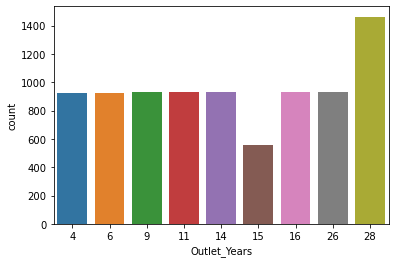

In [28]:
sns.countplot(df['Outlet_Years'])

Count plot shows me that with 28 years of Outlet then sales will be more and all other years show same sales.

# Outlet_Size:

In [29]:
df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

There are 3 unique values in Outlet_size.And Medium is the mode for Outlet_size column.Which i can use to treat null value. 

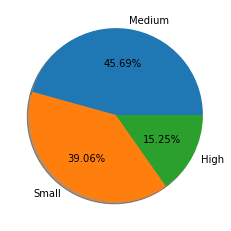

In [30]:
labels='Medium','Small','High'
fig, ax = plt.subplots()
ax.pie(df['Outlet_Size'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

By observing the pie chart i can say that outlets with size Medium are more in number and also outlets with size high are less in number.

# Outlet_Location_Type:

In [31]:
df.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

There are 3 unique types of outlet locations.Let me plot a pie chart for this.

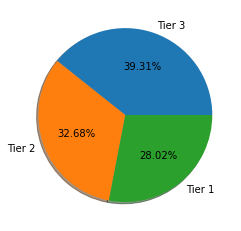

In [32]:
labels='Tier 3','Tier 2','Tier 1'
fig, ax = plt.subplots()
ax.pie(df['Outlet_Location_Type'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

Tier 3 location has maximum count compared to Tier 2 and Tier 1.

# Outlet_Type:

In [33]:
df.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

There are 4 uniques of Outlet_Type.So i can plot pie chart for this.

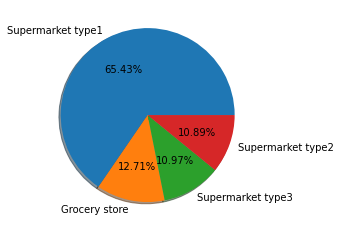

In [34]:
labels='Supermarket type1','Grocery store','Supermarket type3','Supermarket type2'
fig, ax = plt.subplots()
ax.pie(df['Outlet_Type'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

Look at this Supermarket type1 has maximum count which means sales is going good in Supermarket type1.It is good to invest here.

# Bivariate Analysis:

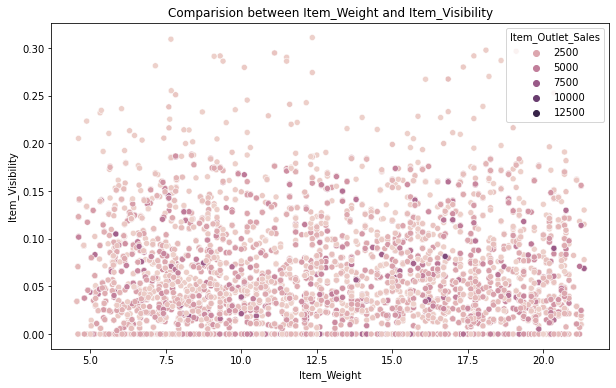

In [35]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Item_Weight and Item_Visibility')
sns.scatterplot(df['Item_Weight'],df['Item_Visibility'],hue=df["Item_Outlet_Sales"]);

I can see that Item_Weight has nothing to do with sales, and as Item_Visibility increases then the sales is going to be reduced.

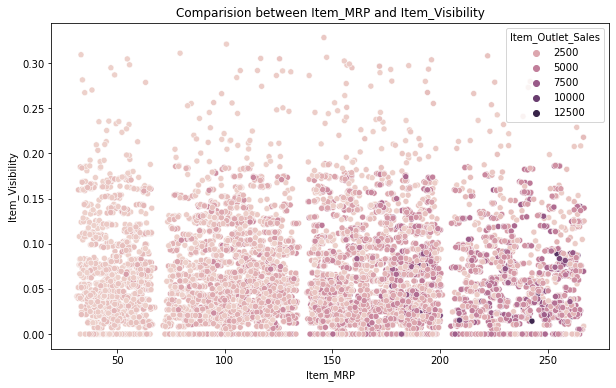

In [36]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Item_MRP and Item_Visibility')
sns.scatterplot(df['Item_MRP'],df['Item_Visibility'],hue=df["Item_Outlet_Sales"]);

- Sales is increaseing consistantly with increase in MRP.
- As the item visibility increases then sales is decreasing.
- The distribution looks clustered with Item_MRP.

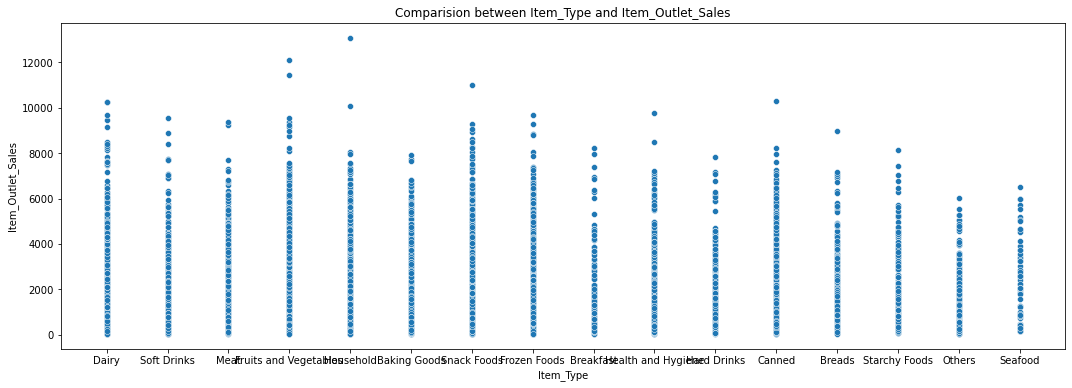

In [37]:
plt.figure(figsize=[18,6])
plt.title('Comparision between Item_Type and Item_Outlet_Sales')
sns.scatterplot(df['Item_Type'],df['Item_Outlet_Sales']);

The sales is more comparitivily for fruits and vegetables,snack foods,and for dairy items.

<AxesSubplot:xlabel='Outlet_Years', ylabel='Item_Outlet_Sales'>

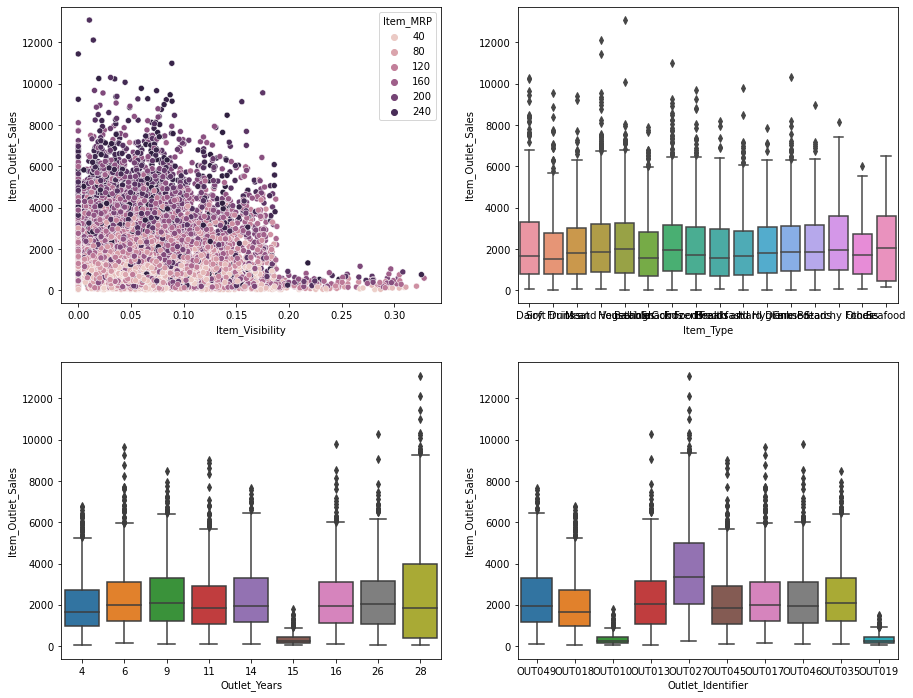

In [38]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_MRP',ax=axes[0,0],data=df)
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',ax=axes[0,1],data=df)
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',ax=axes[1,1],data=df)
sns.boxplot(x='Outlet_Years',y='Item_Outlet_Sales',ax=axes[1,0],data=df)

I can observe from above graphs that
- As the Item visibility increases sales is decreasing.
- And the sales is more for vegetables and fruits.
- OUT027 has maximum sales.
- As the outlet year increases sales also increases.

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

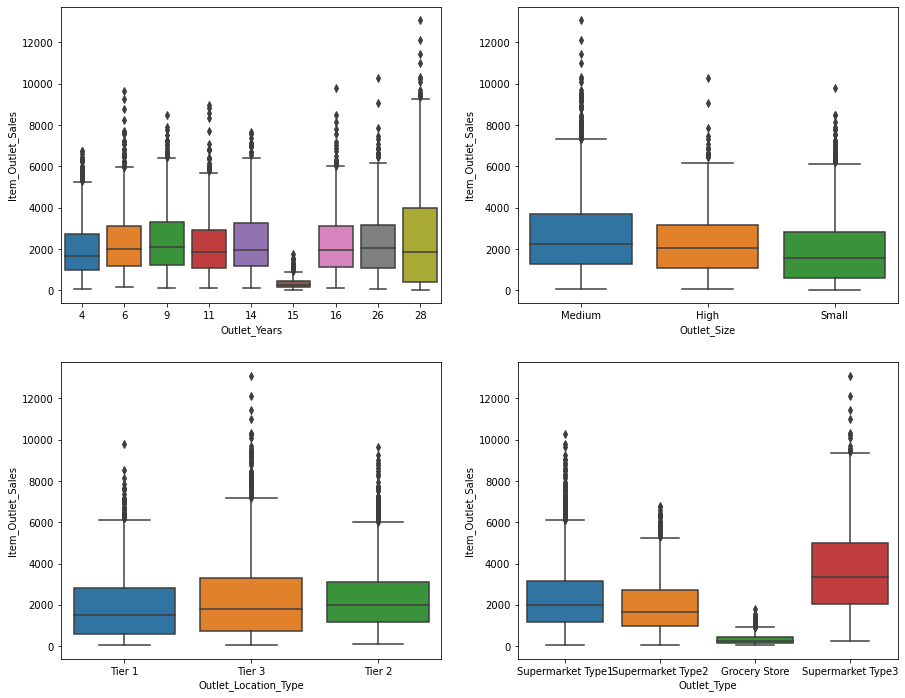

In [39]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Years',y='Item_Outlet_Sales',ax=axes[0,0],data=df)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',ax=axes[0,1],data=df)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',ax=axes[1,0],data=df)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',ax=axes[1,1],data=df)

From above plots i can notice that
- As the outlet year is more sales is also more.
- With medium outlet size sales is more.
- In Tier 3 location type sales is more.
- In Supermarket type 3 outlet type sales is more.

# Multivariate Analysis:

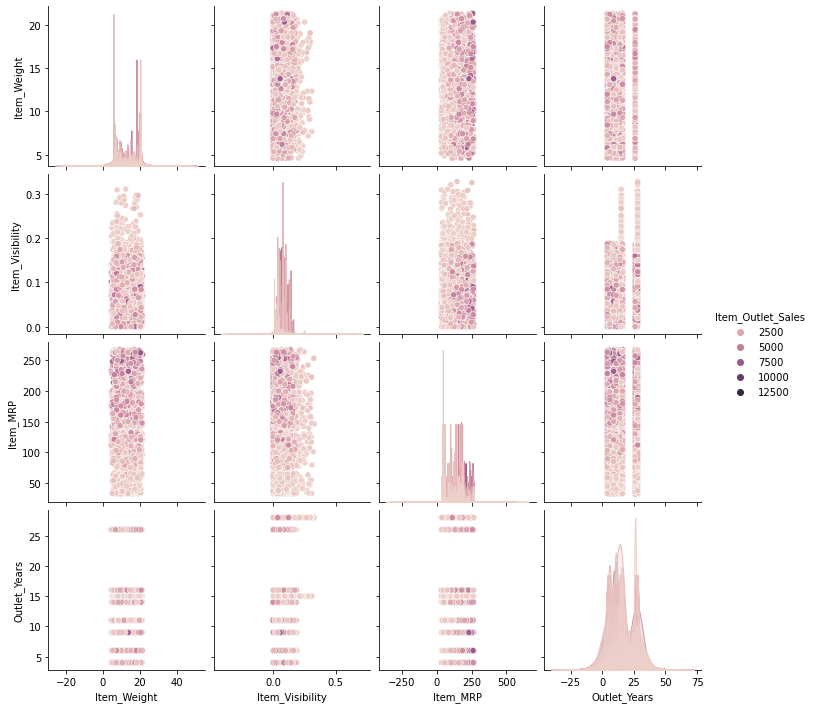

In [40]:
sns.pairplot(df,hue="Item_Outlet_Sales")

Above are the pair plots of all the features.
- I got only 4 by 4 plot because all other columns left out are categorical type columns.

# Data Cleaning:

In [41]:
#Checking for null values
df.isnull().sum()

Item_Identifier            0
Item_Weight             1463
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
Outlet_Years               0
dtype: int64

There are null values in Item_Weight and Outlet_size column.

# Treating the null values using imputation technique:

In [42]:
#Treating null values in Item_Weight column using mean
df["Item_Weight"]=df["Item_Weight"].fillna(df["Item_Weight"].mean())

#Treating null values in Outlet_Size column using mode=Medium
df["Outlet_Size"]=df["Outlet_Size"].fillna(value='Medium')

In [43]:
df.isnull().sum()

Item_Identifier         0
Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
Outlet_Years            0
dtype: int64

It looks i have removed all null values.

In [44]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,26


This is my data after removing null values.

# Checking for outliers: 

<AxesSubplot:>

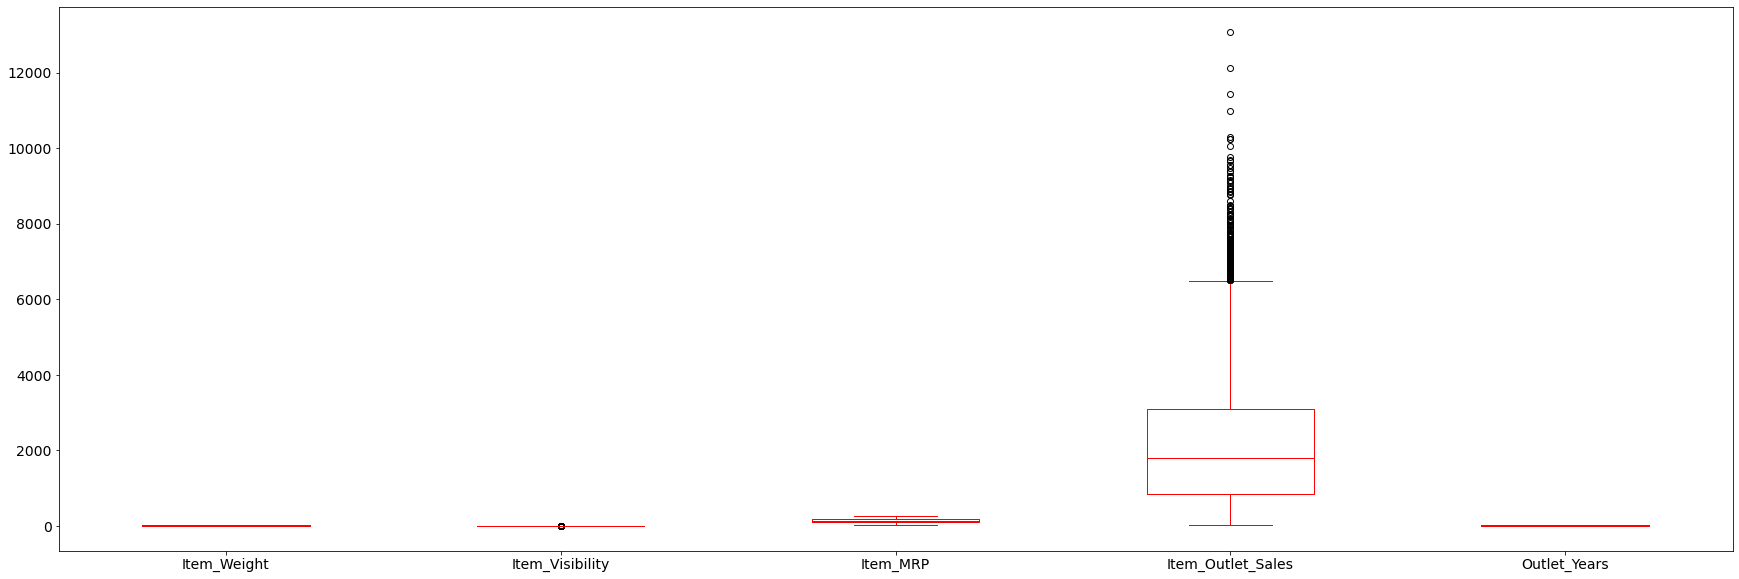

In [45]:
df.plot(kind='box',fontsize=14,figsize=(30,10),color='r')

I have outliers only in Item_Visibility column.The outliers in target column will be not be altered.

# Removing Outliers:

# i) Zscore method:

In [46]:
from scipy.stats import zscore
z=np.abs(zscore(df[["Item_Visibility"]]))
df_new=df[(z<3).all(axis=1)]
df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,26
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,26
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,Medium,Tier 2,Supermarket Type1,549.2850,11
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,9
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,4


Using Zscore i have removed outliers.

In [47]:
#Checking shape of new dataset
df_new.shape

(8428, 12)

In my new data set i have 8428 rows and 12 columns.

In [48]:
#Checking shape of old dataset
df.shape

(8523, 12)

In my old dataset i was having 8523 rows and 12 columns.

In [49]:
Dataloss=(((8523-8428)/8523)*100)
Dataloss

1.1146309984747156

Using Zscore method to remove outliers i got 1.1% dataloss which is less than 10%.But still let me have a look into IQR method also.

# IQR method:

In [50]:
Q1=df[["Item_Visibility"]].quantile(0.25)
Q3=df[["Item_Visibility"]].quantile(0.75)
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

Using IQR i have removed outliers.

In [51]:
#Checking shape of new dataset
df_1.shape

(8379, 12)

In my new dataset i have 8379 rows and 12 columns.

In [52]:
#Checking shape of old dataset
df.shape

(8523, 12)

In my old dataset i was having 8523 rows and 12 columns.

In [53]:
Dataloss=(((8523-8379)/8523)*100)
Dataloss

1.689545934530095

Using IQR method i got 1.6% data loss which is little greater than zscore.So let me stick on to zscore method to remove outliers.

# Checking for skewness:

In [54]:
df_new.skew()

Item_Weight          0.089907
Item_Visibility      0.795956
Item_MRP             0.128945
Item_Outlet_Sales    1.173070
Outlet_Years         0.409186
dtype: float64

I can observe skewness only in Item_Visibility column.Let me remove that.

# Removing Skewness using yeo-johnson method:

In [55]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

Using yeo-johnson method to remove skewness.

In [56]:
df_new[['Item_Visibility']] = scaler.fit_transform(df_new[['Item_Visibility']].values)

Removing skewness from Item_Visibility column.

In [57]:
df_new.skew()

Item_Weight          0.089907
Item_Visibility      0.115444
Item_MRP             0.128945
Item_Outlet_Sales    1.173070
Outlet_Years         0.409186
dtype: float64

Now i can notice that skewness is fully removed from my data set except target column.

# Checking Correlation matrix using heat map:

In [58]:
cor=df_new.corr()

Checking correlation.

In [59]:
cor

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years
Item_Weight,1.000000,-0.009687,0.024435,0.010575,0.008377
Item_Visibility,-0.009687,1.000000,0.004299,-0.076931,0.034066
Item_MRP,0.024435,0.004299,1.000000,0.573491,-0.006989
Item_Outlet_Sales,0.010575,-0.076931,0.573491,1.000000,0.060149
Outlet_Years,0.008377,0.034066,-0.006989,0.060149,1.000000


Above are the correlations of each pair of features.Let me visualize it using heat map to get better insight.

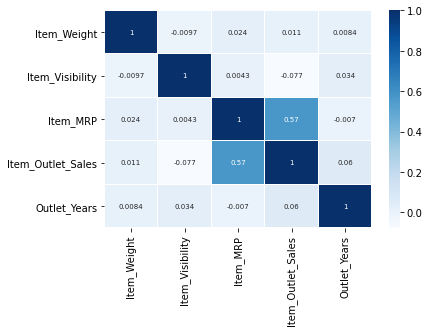

In [60]:
plt.figure(figsize=(6,4))
sns.heatmap(df_new.corr(),linewidths=.1,cmap="Blues",annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);

I can observe from heat map that
- Target is higly correlated with Item_MRP.
- Target is very less correlated with Item_Visibility and Item_weight.
- I can drop Item_Weight if necessary.

# Visualizing correlation of target variable using bar plot:

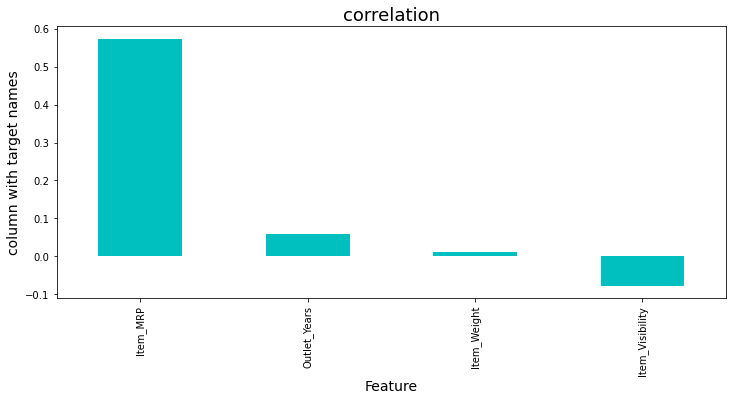

In [61]:
plt.figure(figsize=(12,5))
df_new.corr()['Item_Outlet_Sales'].sort_values(ascending=False).drop(['Item_Outlet_Sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Item_Weight is less correlated so i can drop that column.

And also i'm droping Item_Identifier and Outlet_Identifier column since they have nothing to do with my model training.

In [62]:
#Droping Item_Weight column since it is less correlated with target variable.
df_new = df_new.drop(["Item_Weight"],axis=1)

In [63]:
df_new.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,FDA15,Low Fat,-1.142270,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,Regular,-1.032913,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,Low Fat,-1.117874,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,Regular,-1.734798,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,15
4,NCD19,Low Fat,-1.734798,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,26


Above is my new dataset after cleaning.

# Label Encoding:

In [64]:
#Encoding all categorical columns
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
categorical_columns = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df_new[column] = label_encoders[column].fit_transform(df_new[column])

In [65]:
df_new

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,156,0,-1.142270,4,249.8092,9,1,0,1,3735.1380,14
1,8,1,-1.032913,14,48.2692,3,1,2,2,443.4228,4
2,662,0,-1.117874,10,141.6180,9,1,0,1,2097.2700,14
3,1121,1,-1.734798,6,182.0950,0,1,2,0,732.3800,15
4,1297,0,-1.734798,9,53.8614,1,0,2,1,994.7052,26
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,0,0.033409,13,214.5218,1,0,2,1,2778.3834,26
8519,897,1,-0.212619,0,108.1570,7,1,1,1,549.2850,11
8520,1357,0,-0.537754,8,85.1224,6,2,1,1,1193.1136,9
8521,681,1,1.538309,13,103.1332,3,1,2,2,1845.5976,4


# Preprocessing:

In [66]:
x = df_new.drop("Item_Outlet_Sales",axis=1)
y = df_new["Item_Outlet_Sales"]

Assigned y as target variable and x as remaining features.

# Scaling data using MinMaxScaler:

In [67]:
#importing necessary libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [68]:
mms=MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x), columns=x.columns)

I have sclaed the data using MinMaxScaler.

In [69]:
x

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,0.100128,0.0,0.150584,0.266667,0.927507,1.000000,0.5,0.0,0.333333,0.416667
1,0.005135,1.0,0.178376,0.933333,0.072068,0.333333,0.5,1.0,0.666667,0.000000
2,0.424904,0.0,0.156784,0.666667,0.468288,1.000000,0.5,0.0,0.333333,0.416667
3,0.719512,1.0,0.000000,0.400000,0.640093,0.000000,0.5,1.0,0.000000,0.458333
4,0.832478,0.0,0.000000,0.600000,0.095805,0.111111,0.0,1.0,0.333333,0.916667
...,...,...,...,...,...,...,...,...,...,...
8423,0.237484,0.0,0.449370,0.866667,0.777729,0.111111,0.0,1.0,0.333333,0.916667
8424,0.575738,1.0,0.386845,0.000000,0.326263,0.777778,0.5,0.5,0.333333,0.291667
8425,0.870988,0.0,0.304215,0.533333,0.228492,0.666667,1.0,0.5,0.333333,0.208333
8426,0.437099,1.0,0.831823,0.866667,0.304939,0.333333,0.5,1.0,0.666667,0.000000


This is my dependent variables after scaling.

# Finding Best Random State:

In [70]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.5385004932919601  on Random_state  115


I got the best accuracy and random state.

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

Created train and test data.

# Regression Algorithms

In [72]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# i) Linear Regression:

In [73]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.5385004932919601


Linear regression is giving me 53.85% r2_score.

# ii) RandomForestRegressor:

In [74]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.5842398348429734


RandomForestRegressor is giving me 58.42% r2_score.

# iii) K-Neighbor Regressor:

In [75]:
knnr=KNN()
knnr.fit(x_train,y_train)
pred=knnr.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.5347445441735561


K-Neighbor Regressor is giving me 53.47% r2_score.

# iv) Stochastic Gradient Descent Regressor:

In [76]:
SGD=SGDRegressor()
SGD.fit(x_train,y_train)
pred=SGD.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.5364896652679388


Stochastic Gradient Descent Regressor is giving me 53.65% r2_score.

# v) Bagging Regressor:

In [77]:
from sklearn.ensemble import BaggingRegressor
Bar=BaggingRegressor()
Bar.fit(x_train,y_train)
pred=Bar.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.5555091475397114


Bagging Regressor is giving me 55.55% r2_score.

# vi) AdaBoostRegressor:

In [78]:
from sklearn.ensemble import AdaBoostRegressor
ABR=AdaBoostRegressor()
ABR.fit(x_train,y_train)
pred=ABR.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.5277885714465735


AdaBoostRegressor is giving me 52.78% r2_score.

# Cross Validation scores:

In [79]:
print(cross_val_score(lr,x,y,cv=5).mean())

0.5045612869447847


In [80]:
print(cross_val_score(RFR,x,y,cv=5).mean())

0.545752999457998


In [81]:
print(cross_val_score(knnr,x,y,cv=5).mean())

0.5060268097215176


In [82]:
print(cross_val_score(SGD,x,y,cv=5).mean())

0.5038473974948557


In [83]:
print(cross_val_score(Bar,x,y,cv=5).mean())

0.5137267062017564


In [84]:
print(cross_val_score(ABR,x,y,cv=5).mean())

0.46583104599162056


Above are the cross validation scores of lr,RFR,KNN,SGD,Bar and ABR.

And looking into the difference of r2_scores of the model and the cross validation score i found that KNN as the best model.

# Hyper Parameter tuning:

In [85]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [87]:
parameter = {'n_neighbors':[1,2,3,4,5,6],
             'weights':['uniform','distance'],
             'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
             'n_jobs':[1,2,3,4,5]}

Giving KNN Parameters.

In [88]:
GCV=GridSearchCV(KNN(),parameter,cv=5)

Runing GridSearchCV for KNN.

In [89]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_jobs': [1, 2, 3, 4, 5],
                         'n_neighbors': [1, 2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

Tuning the model using GridSearchCV.

In [90]:
GCV.best_params_

{'algorithm': 'auto', 'n_jobs': 1, 'n_neighbors': 6, 'weights': 'uniform'}

Got the best parameters.

In [91]:
Final_mod=KNN(algorithm='auto',n_jobs=1,n_neighbors=6,weights='uniform')
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=r2_score(y_test, pred)

print(acc*100)

54.843067413420535


After hyper parameter tuning r2_score has been increased a little and i got r2_score as 54.84%.

# Saving the model:

In [92]:
#Saving the model as .pkl file
import joblib
joblib.dump(Final_mod,"Bigdatamartsales.pkl")

['Bigdatamartsales.pkl']

I have saved my model using joblib.

# Test data:

In [93]:
dff=pd.read_csv("Bigdata_test.csv") #reading csv file
dff.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [94]:
#Checking shape of test dataset
dff.shape

(5681, 11)

My test data has 5681 rows and 11 columns.

In [95]:
#Checking all column names in test data set
dff.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

Above are the column names of test data.

In [96]:
#Checking the data types of each column
dff.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

Item_Weight, Item_Visibility, Item_MRP are float type datas and  Outlet_Establishment_Year is integer type data rest all columns are object type data.

In [97]:
#Checking info of data set
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


I can notice there are null values in Item_Weight and Outlet_Size,and dtypes are also printed as above.

In [98]:
#Checking unique values in each column
dff.nunique()

Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

Above are the unique values of each column.

In [99]:
#Checking the null values
dff.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

There are null values in Item_Weight and Outlet_Size.I have treat them.

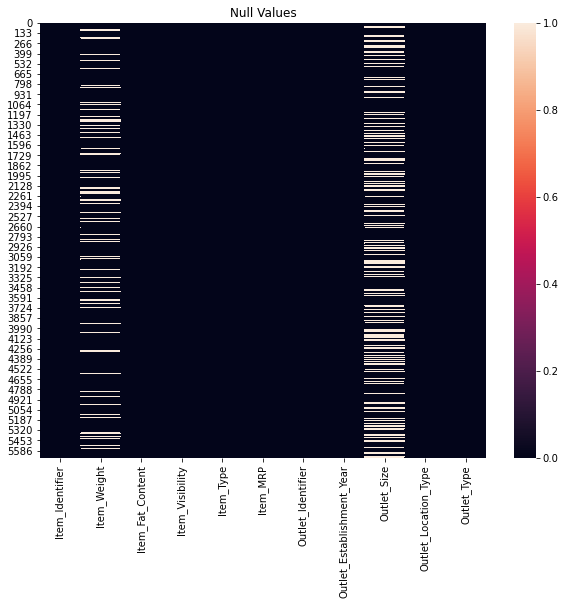

In [100]:
plt.figure(figsize=[10,8])
sns.heatmap(dff.isnull())
plt.title("Null Values")
plt.show()

I can observe that i have null values in Item_Weight and Outlet_Size columns.

In [101]:
#describing the data set
dff.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


Above is the statistics about test data set.

In [102]:
dff.Item_Fat_Content.value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

LF, low fat belong to same category that is Low Fat and reg belong to Regular category so replacing LF, low fat and reg to thier category.

In [103]:
dff.Item_Fat_Content=dff.Item_Fat_Content.replace('LF','Low Fat')
dff.Item_Fat_Content=dff.Item_Fat_Content.replace('low fat','Low Fat')
dff.Item_Fat_Content=dff.Item_Fat_Content.replace('reg','Regular')

I have replace LF and low fat by Low Fat, and reg by Regular.Now lets check the value count of Item_Fat_Content.

In [104]:
dff.Item_Fat_Content.value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

Now in Item_Fat_Content i have only two categories.

In [105]:
dff['Outlet_Years']=2013-dff['Outlet_Establishment_Year']

Since Outlet_Establishment_Year is not that much important.Let me do feature engineering and get Outlet_Year from Outlet_Establishment_Year.

In [106]:
dff.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,14
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,6
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,15
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,6
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,28


Now i got Outlet_Years from Outlet_Establishment_Year.I can drop Outlet_Establishment_Year now.

In [107]:
dff = dff.drop(["Outlet_Establishment_Year"],axis=1)

In [108]:
dff.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,14
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,NaN,Tier 2,Supermarket Type1,6
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,NaN,Tier 3,Grocery Store,15
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,NaN,Tier 2,Supermarket Type1,6
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,28


# Data Cleaning:

In [109]:
#Checking for null values
dff.isnull().sum()

Item_Identifier            0
Item_Weight              976
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             1606
Outlet_Location_Type       0
Outlet_Type                0
Outlet_Years               0
dtype: int64

I have null values in Item_Weight and Outlet_Size columns.Let me treat them using imputation method.

# Treating the null values using imputation method:

In [110]:
dff.Outlet_Size.value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

So the mode of Outlet_Size is Medium.

In [111]:
#Treating null values in Item_Weight column using mean
dff["Item_Weight"]=dff["Item_Weight"].fillna(dff["Item_Weight"].mean())

#Treating null values in Outlet_Size column using mode=Medium
dff["Outlet_Size"]=dff["Outlet_Size"].fillna(value='Medium')

In [112]:
dff.isnull().sum()

Item_Identifier         0
Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Outlet_Years            0
dtype: int64

So i have removed all null values.

In [113]:
dff.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,14
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,Medium,Tier 2,Supermarket Type1,6
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,Medium,Tier 3,Grocery Store,15
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,Medium,Tier 2,Supermarket Type1,6
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,28


This is my data after removing null values.

# Checking for outliers:

<AxesSubplot:>

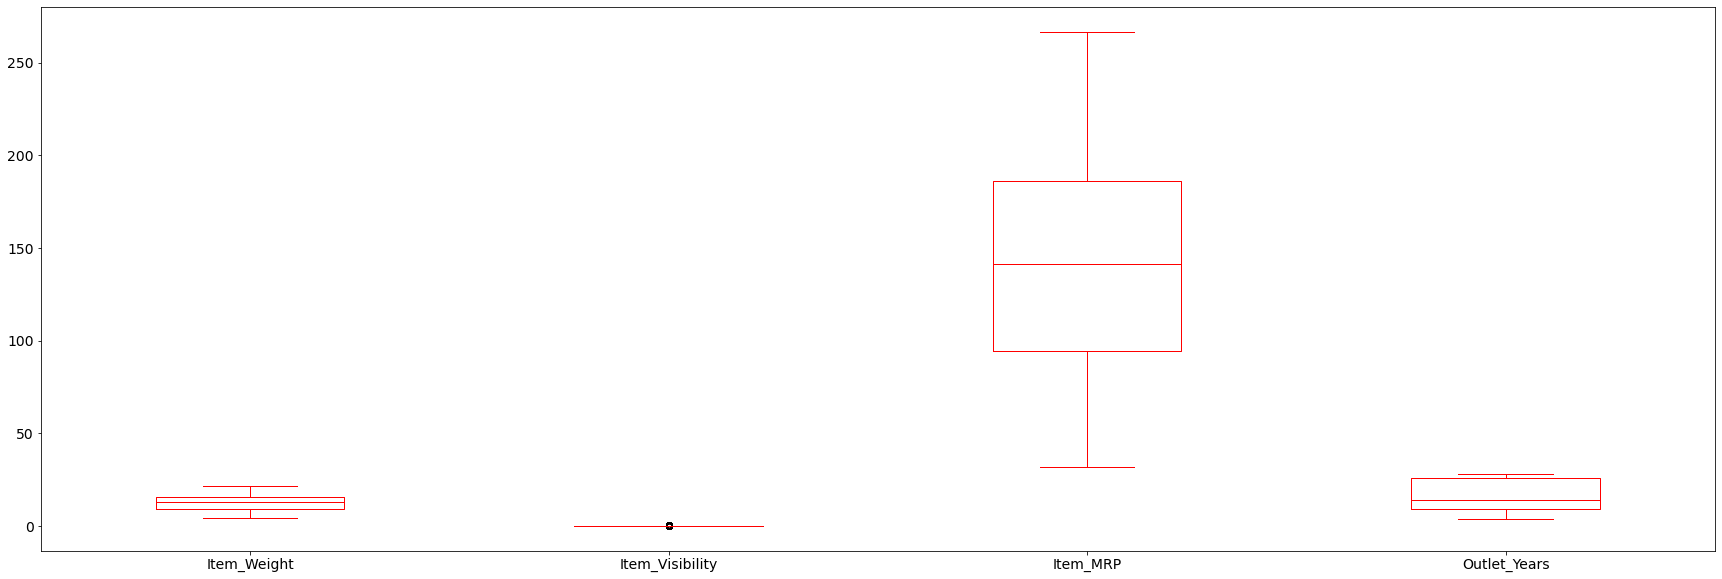

In [114]:
dff.plot(kind='box',fontsize=14,figsize=(30,10),color='r')

I have outliers only in Item_Visibility column.

# Removing outliers:

# i) Zscore method:

In [115]:
from scipy.stats import zscore
z=np.abs(zscore(dff[["Item_Visibility"]]))
dff_new=dff[(z<3).all(axis=1)]
dff_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,14
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,Medium,Tier 2,Supermarket Type1,6
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,Medium,Tier 3,Grocery Store,15
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,Medium,Tier 2,Supermarket Type1,6
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,28
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,Small,Tier 1,Supermarket Type1,16
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,Medium,Tier 3,Supermarket Type2,4
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,Medium,Tier 2,Supermarket Type1,11
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,Medium,Tier 2,Supermarket Type1,6


In [116]:
#Checking shape of new dataset
dff_new.shape

(5600, 11)

In [117]:
#Checking shape of old dataset
dff.shape

(5681, 11)

In [118]:
Dataloss=(((5681-5600)/5681)*100)
Dataloss

1.425805315965499

Using Zscore method to remove outliers i got 1.1% dataloss which is less than 10%.

# Checking for skewness: 

In [119]:
dff_new.skew()

Item_Weight        0.140901
Item_Visibility    0.787861
Item_MRP           0.133061
Outlet_Years       0.411451
dtype: float64

I can observe skewness only in Item_Visibility column.Let me remove that.

# Removing Skewness using yeo-johnson method:

In [120]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [121]:
dff_new[['Item_Visibility']] = scaler.fit_transform(dff_new[['Item_Visibility']].values)

Using yeo-johnson method to remove skewness.

In [122]:
dff_new.skew()

Item_Weight        0.140901
Item_Visibility    0.105676
Item_MRP           0.133061
Outlet_Years       0.411451
dtype: float64

Now i can notice that skewness is fully removed from my data set except target column.

In [123]:
#Droping Item_Weight column 
dff_new = dff_new.drop(["Item_Weight"],axis=1)

In [124]:
dff_new.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,FDW58,Low Fat,-1.453107,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,14
1,FDW14,Regular,-0.440632,Dairy,87.3198,OUT017,Medium,Tier 2,Supermarket Type1,6
2,NCN55,Low Fat,0.926222,Others,241.7538,OUT010,Medium,Tier 3,Grocery Store,15
3,FDQ58,Low Fat,-1.170062,Snack Foods,155.0340,OUT017,Medium,Tier 2,Supermarket Type1,6
4,FDY38,Regular,1.229130,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,28


# Label encoding:

In [125]:
#Encoding all categorical columns
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
categorical_columns = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    dff_new[column] = label_encoders[column].fit_transform(dff_new[column])

In [126]:
dff_new.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,1102,0,-1.453107,13,107.8622,9,1,0,1,14
1,1066,1,-0.440632,4,87.3198,2,1,1,1,6
2,1405,0,0.926222,11,241.7538,0,1,2,0,15
3,809,0,-1.170062,13,155.0340,2,1,1,1,6
4,1183,1,1.229130,4,234.2300,5,1,2,3,28


# Scaling the data using MinMaxScaler:

In [127]:
#importing necessary libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [128]:
mms=MinMaxScaler()
dff_new = pd.DataFrame(mms.fit_transform(dff_new), columns=dff_new.columns)

In [129]:
dff_new.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,0.715120,0.0,0.073469,0.866667,0.323413,1.000000,0.5,0.0,0.333333,0.416667
1,0.691759,1.0,0.327372,0.266667,0.235849,0.222222,0.5,0.5,0.333333,0.083333
2,0.911746,0.0,0.670144,0.733333,0.894140,0.000000,0.5,1.0,0.000000,0.458333
3,0.524984,0.0,0.144449,0.866667,0.524488,0.222222,0.5,0.5,0.333333,0.083333
4,0.767683,1.0,0.746106,0.266667,0.862069,0.555556,0.5,1.0,1.000000,1.000000


In [130]:
dff_new.shape

(5600, 10)

# Loading saved trained file:

In [131]:
model=joblib.load("Bigdatamartsales.pkl")

I have loaded the saved trained file.

In [132]:
Prediction=model.predict(x_test)

Predicting using saved model.

In [133]:
prediction=pd.DataFrame(Prediction)

Framing the predictions.

In [134]:
prediction

,0
0,1627.326167
1,2917.979467
2,2256.729100
3,178.101500
4,1704.226067
...,...
2524,1511.698900
2525,4937.239900
2526,2235.756400
2527,1345.359867


Above are my predicted values using trained models.

In [135]:
prediction.to_csv('Item_Outlet_Sales.csv',index=False)

I have saved my predictions.

In [138]:
Prediction=model.predict(x_train)

Predicting using saved model.

In [139]:
prediction1=pd.DataFrame(Prediction)

In [140]:
prediction1

,0
0,2525.268433
1,1696.236467
2,1235.613833
3,710.297633
4,1093.132633
...,...
5894,1777.686000
5895,300.830633
5896,5760.723533
5897,2693.826800


Above are my predicted values.

In [141]:
prediction1.to_csv('Item_Outlet_Sales.csv',index=False)

Saving the predictions.

# DONE